单变量线性回归
======

# 简介

根据人口预测利润  输入变量只有一个特征 人口，输出变量为利润

维度:
| 变量 | 维度  | 备注 | 
| ---  | --- | --- | 
| X | m*n | 97 * 2 注: 在 X 前加一列全1, 作为偏置(bias, 即theta 0)的特征值, 因此n变成2 |
| y | m*1 | 97 * 1|
| theta | n*1 | 2 * 1 |

In [103]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 全局设置
plt.rcParams['figure.figsize']=(16, 8)
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False


# 原始数据

In [104]:
# pandas 方式
data = pd.read_csv('ex1data1.txt', names =[ 'Population','profit'])

# numpy 方式
# data = np.loadtxt('ex1data1.txt', delimiter=',')



In [105]:
data[:10]


,Population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [106]:
data.shape


(97, 2)

In [107]:
X=data.iloc[:, :-1]
y=data.iloc[:, -1:]

m = len(data)

print(X.shape, y.shape, m)


(97, 1) (97, 1) 97


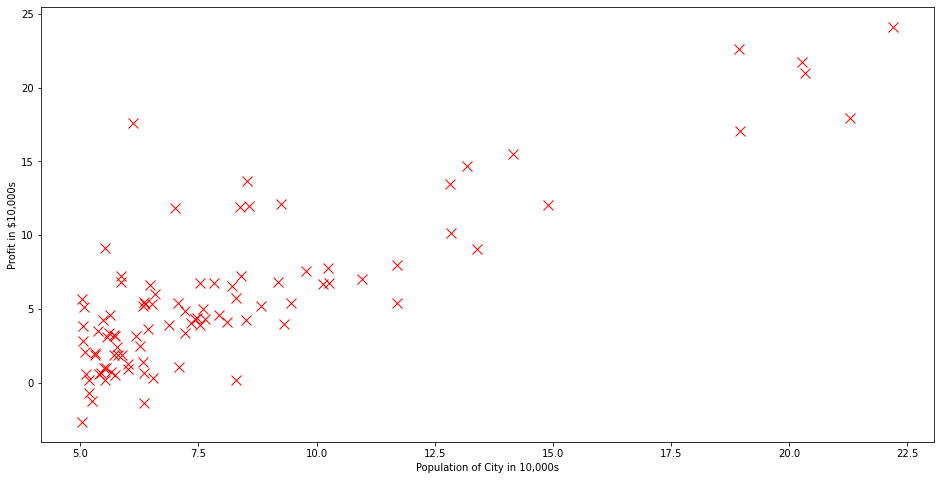

In [108]:
plt.plot(X, y, 'rx', markersize=10)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()


# 构建训练集

In [111]:
# 在 X 前加一列 1, 作为偏置(bias, 即theta 0)的x值
X.insert(0, 'ones', 1)

## 转换为numpy 的ndarray
X = X.values
y = y.values

### 下面是 numpy 插入一列的方式, 还是pandas 方便
# X = np.c_[np.ones(m), X]

theta = np.zeros((X.shape[1], 1))  # 特征向量, n=2, theta 0 即 bias 的权重

print(X.shape, y.shape, theta.shape)

iterations = 1500
alpha = 0.01


(97, 2) (97, 1) (2, 1)


# 损失函数

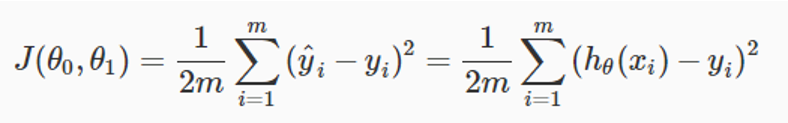



In [112]:
def computeCost(X, y, theta) -> float:
    '''
    COMPUTECOST Compute cost for linear regression:
        J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
        parameter for linear regression to fit the data points in X and y
    '''
    m = len(y) # number of training examples
    A = X @ theta - y   # m*n x n*1 -> m*1
    cost = A.T @ A / (2*m)

    '''
    另一种实现方法:
    A = np.power(X @ theta - y, 2)
    cost = np.sum(A) / (2*m)
    '''

    return cost.item()


In [113]:
# compute and display initial cost
print('\nTesting the cost function ...\n')
#compute and display initial cost
J = computeCost(X, y, theta)
print(f'With theta = [0 ; 0]\nCost computed = {J}\n')
print('Expected cost value (approx) 32.07\n')



Testing the cost function ...

With theta = [0 ; 0]
Cost computed = 32.072733877455676

Expected cost value (approx) 32.07



In [114]:
# further testing of the cost function
J = computeCost(X, y, [[-1], [2]])
print(f'\nWith theta = [-1 ; 2]\nCost computed = {J}\n')
print('Expected cost value (approx) 54.24\n')



With theta = [-1 ; 2]
Cost computed = 54.24245508201238

Expected cost value (approx) 54.24



# 梯度下降函数

梯度计算 (求偏导)

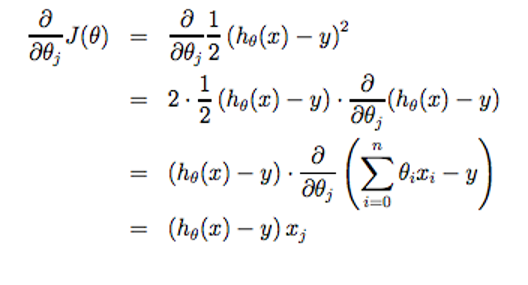

向量化

预测函数 $ h = Xθ = x_0θ_0 + x_1θ_1 + ... + x_nθ_n$ 

$ grad= \frac{1}{m} X^T (h−y) $

$θ=θ−α×grad$

In [115]:
def gradientDescent(X, y, theta, alpha, num_iters):
    '''
    GRADIENTDESCENT Performs gradient descent to learn theta
        theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by
        taking num_iters gradient steps with learning rate alpha
    '''
    m = len(y) # number of training examples
    J_history = []
    for i in range(num_iters):
        grad = X.T @ (X @ theta - y) / m
        theta -= alpha * grad
        cost = computeCost(X, y, theta)
        J_history.append(cost)
        if i % 100 == 0:
            print(f'iter: {i} cost: {cost}')
    return theta, J_history


In [116]:
print('\nRunning Gradient Descent ...\n')
# run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)



Running Gradient Descent ...

iter: 0 cost: 6.737190464870009
iter: 100 cost: 5.476362817272741
iter: 200 cost: 5.173634551165023
iter: 300 cost: 4.962606493117519
iter: 400 cost: 4.815501494116686
iter: 500 cost: 4.712956453749759
iter: 600 cost: 4.6414735988143185
iter: 700 cost: 4.591643801766726
iter: 800 cost: 4.556908078409751
iter: 900 cost: 4.532694243543436
iter: 1000 cost: 4.515815084502823
iter: 1100 cost: 4.504048835517841
iter: 1200 cost: 4.495846731678218
iter: 1300 cost: 4.490129148489064
iter: 1400 cost: 4.486143493324961


#  代价函数可视化

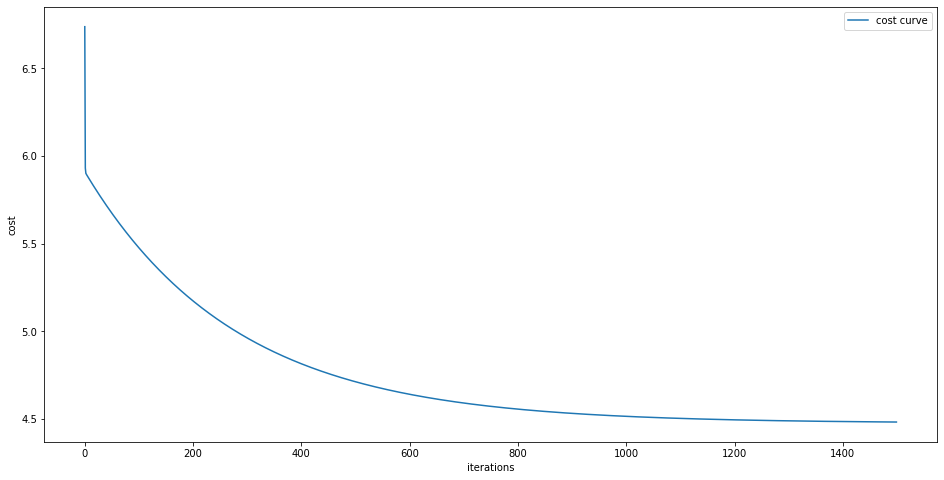

In [117]:
plt.plot(np.arange(len(J_history)), J_history, label='cost curve')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.legend()


In [118]:
print('Theta found by gradient descent:\n')
print(theta)
print('Expected theta values (approx)\n')
print(' -3.6303\n  1.1664\n\n')

# theta[0] 为 线性方程 y = w*x + b 中的截距b; theta[1] 为系数w


Theta found by gradient descent:

[[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)

 -3.6303
  1.1664




# 拟合函数可视化 

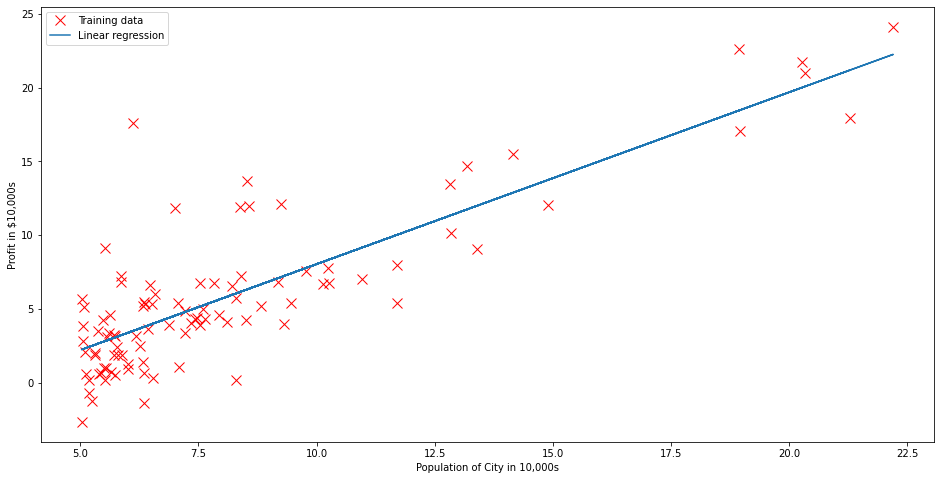

In [119]:
plt.plot(X[:,1], y, 'rx', markersize=10, label='Training data')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], X @ theta, '-', label='Linear regression')
plt.legend()


# 预测

In [120]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print(f'For population = 35,000, we predict a profit of {predict1*10000}\n') # approx 4519.767868
predict2 = np.dot([1, 7], theta)
print(f'For population = 70,000, we predict a profit of {predict2*10000}\n') # approx 45342.450129


For population = 35,000, we predict a profit of [4519.7678677]

For population = 70,000, we predict a profit of [45342.45012945]



# theta 可视化

In [121]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
u, v = np.meshgrid(theta0_vals, theta1_vals)

# initialize J_vals to a matrix of 0's
# J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
J_vals = np.zeros(u.shape)

# Fill out J_vals
for i in range(J_vals.shape[0]):
    for j in range(J_vals.shape[1]):
        t = [[u[i,j]], [v[i,j]]]
        J_vals[i,j] = computeCost(X, y, t)


## 三维图

Text(0.5, 0, 'loss')

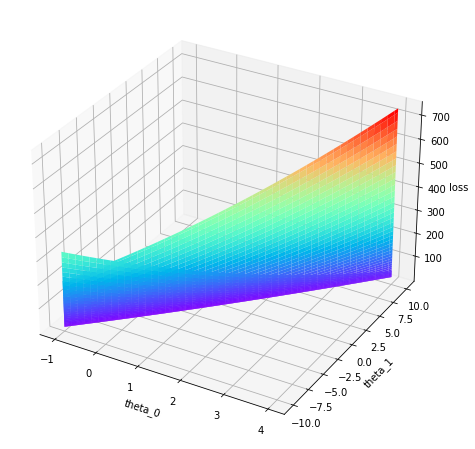

In [126]:
from matplotlib import cm
# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(theta0_vals, theta1_vals, J_vals,  cmap='rainbow')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('loss')


## 等高线

[-3.63029144] [1.16636235]


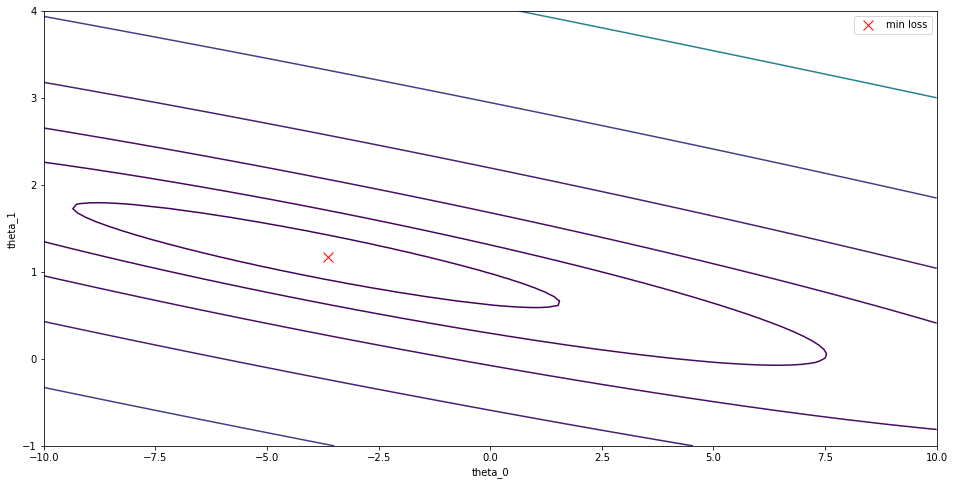

In [125]:
# Contour plot

# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 15))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2, label='min loss')
plt.legend()
print(theta[0], theta[1])
